In [19]:
import random
from collections import namedtuple
from matplotlib import pyplot as plt

In [20]:
N= 100

NUM_GENERATIONS= 500

OFFSPRING_SIZE = 20
POPULATION_SIZE= 30

MIN= -1000000000
MAX= 1000000000




In [21]:
#The function that creates randomly the lists for the Set Covering Problem

def problem(N, seed=None):
    random.seed(seed)
    return [
        list(set(random.randint(0, N - 1) for n in range(random.randint(N // 5, N // 2))))
        for n in range(random.randint(N, N * 5))
    ]

lists = sorted(list(set((tuple(sorted(l))) for l in problem(N, seed= 42))),  key=lambda l: len(l))
PROBLEM_SIZE= len(lists)


# Functions for Personal Algorithm

In [22]:
def add_list(lists, state):
    for l in lists:
        for i in l:
            if not any(element == i for element in state[0]):
                state[0]= set(list(state[0]) + list(l))
                state[1]= set(list(state[1]) + [lists.index(l)])
                return 


def heuristic_mutation(lists, state, added):
    # remove the list with the maximum cost from the set of selected lists so far. The cost is calculated as the number of
    # repetitions minus the number of new elemements of the considered list, w.r.t. the selected lists so far without 
    # the considered list
    selectedLists=[]
    selectedCost=[MIN, []]
    for i in state[1]:
        selectedLists.append(lists[i])
    for l in selectedLists:
        temp= selectedLists.copy()
        temp.remove(l)
        curr=[]
        for el in temp:
            curr+= el
        curr= set(curr)
        t= list(curr) + list(l)
        repetitions= len(t) - len(set(t))
        newElements= len(set(t)) - len(curr)
        cost= repetitions - newElements
        if(cost > selectedCost[0] and l != added):
            selectedCost= [cost, l]
    rem= selectedCost[1]
    state[1].remove(lists.index(selectedCost[1]))
    selectedLists.remove(selectedCost[1])
    concatenation=[]
    for e in selectedLists:
        concatenation+= e
    state[0]= set(concatenation)

    # add the list with the minimum cost from all the lists at disposal. The cost is caculated as the number of repetitions 
    # minus the number of new elemements of the considered list, w.r.t. the selected lists so far (already without the 
    # removed list, see the code above)
    selectedCost=[MAX, []]
    for l in lists:
        temp= list(state[0]) + list(l)
        repetitions= len(temp) - len(set(temp))
        newElements= len(set(temp)) - len(state[0])
        cost= repetitions - newElements
        if (cost < selectedCost[0] and l != rem ): #and not any(lists.index(l)== e for e in state[1])):#and l != rem ):#and not any(lists.index(l)== e for e in state[1])):
            selectedCost= [cost, l]
    state[1].add(lists.index(selectedCost[1]))
    for e in selectedCost[1]:
        state[0].add(e)
        
    return selectedCost[1]
        
            
def condToExit(lists, state):
    w=0
    for i in state[1]:
        w+= len(lists[i])
    if w==N and len(state[0])==N:
        return True
    else:
        return False     


    

# Functions for GA

In [23]:
def setcovering(genome, lists):
    w=0
    for i in range(len(genome)):
        w+= genome[i]*len(lists[i])
    return w

def isASolution(ind, lists):
    l=[]
    for i in range(PROBLEM_SIZE):
        if ind.genome[i]==1:
            l+=lists[i]
    l= set(l)
    #return 0 if it is a solution, 1 if a number is missing to be a solution...
    return len(set(range(N)))-len(l)


def tournament(population, tournament_size=2):
    return min(random.choices(population, k=tournament_size), key=lambda i: i.fitness)


def cross_over_four(g1, g2):
    cut1 = random.randint(0, int(PROBLEM_SIZE/3))
    cut2 = random.randint(int(PROBLEM_SIZE/3), int(2*PROBLEM_SIZE/3))
    cut3 = random.randint(int(2*PROBLEM_SIZE/3), PROBLEM_SIZE)
    if random.random() < 0.5:
        return g1[:cut1] + g2[cut1:cut2] + g1[cut2:cut3] + g2[cut3:]
    else:
        return g2[:cut1] + g1[cut1:cut2] + g2[cut2:cut3] + g1[cut3:]
    

def cross_over(g1, g2):
    cut = random.randint(0, PROBLEM_SIZE)
    if random.random() < 0.5:
        return g1[:cut] + g2[cut:]
    else:
        return g2[:cut] + g1[cut:]


def mutation(g):
    point = random.randint(0, PROBLEM_SIZE - 1)
    return g[:point] + (1 - g[point],) + g[point + 1 :]


def sorter(ind, lists): 
    isASol= isASolution(ind, lists) 
    w= ind.fitness
    return (isASol, w)
        

# MAIN

Personal Algorithm:
Selected Lists=  [(10, 19, 21, 31, 34, 36, 43, 46, 47, 53, 60, 64, 67, 80, 85, 91, 96), (1, 5, 11, 15, 19, 20, 21, 31, 35, 47, 50, 60, 63, 74, 76, 88, 98), (2, 7, 12, 20, 27, 32, 33, 42, 44, 46, 50, 57, 60, 71, 80, 88, 95), (3, 11, 13, 16, 23, 34, 39, 45, 46, 52, 55, 56, 57, 65, 70, 71, 97), (7, 10, 19, 35, 36, 39, 50, 51, 53, 54, 64, 68, 78, 80, 81, 89, 91, 98), (3, 4, 11, 13, 17, 27, 28, 29, 31, 35, 54, 64, 69, 71, 75, 77, 86, 94), (9, 13, 14, 16, 21, 36, 38, 41, 44, 51, 59, 60, 61, 65, 71, 73, 77, 83, 91, 98), (0, 2, 4, 12, 17, 19, 27, 28, 35, 38, 40, 65, 66, 70, 71, 73, 88, 98), (2, 8, 18, 20, 22, 23, 24, 36, 39, 50, 58, 62, 63, 72, 77, 82, 87, 93), (6, 14, 24, 26, 30, 37, 38, 49, 50, 63, 65, 66, 76, 77, 81, 82, 84, 95), (1, 25, 28, 32, 47, 56, 69, 75, 77, 79, 81, 82, 90, 92, 94, 95, 96, 99), (0, 1, 5, 7, 12, 27, 34, 43, 48, 54, 60, 62, 66, 74, 77, 85, 96, 97)]
Weight=  214 


Genetic Agorithm:
Selected Lists:  [(0, 9, 13, 14, 22, 24, 28, 32, 33, 35, 37, 43, 44,

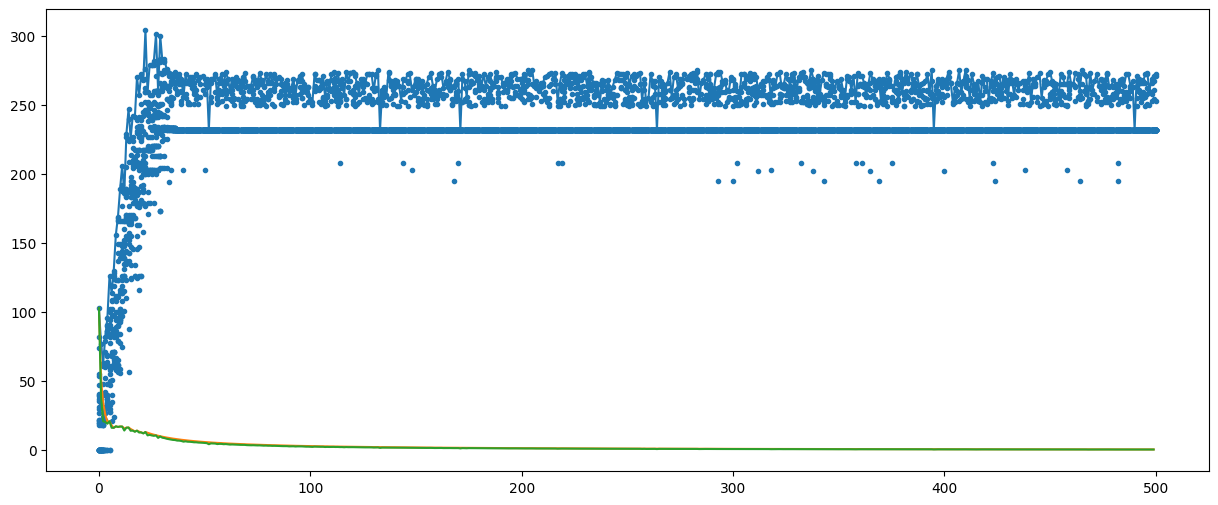

In [24]:
if __name__ == "__main__":

    #-------------------------------------------------------------------------------------------------#

    # PERSONAL ALGORITHM JOINING DIFFERENT TECHNIQUES
    #state= [{numbers obtained so far: goal 0..N-1}, {indeces of lists that composes it}]
    state= [set(), set()] 
    exit_= False
    
    while len(state[0]) < N:
        add_list(lists, state) 
        if condToExit(lists, state):
            exit_= True
            break
    added=[]
    for g in range(NUM_GENERATIONS):
        added= heuristic_mutation(lists, state, added)
        if condToExit(lists, state):
            exit_= True
            break
        
    while len(state[0]) < N:
        add_list(lists, state) 
        
    selLists=[]
    w=0
    for i in state[1]:
        selLists.append(lists[i])
        w+= len(lists[i])
    
    print("Personal Algorithm:")
    # print(len(state[0]))
    print("Selected Lists= ",selLists)
    print("Weight= ", w, "\n\n")     
    
       
    #------------------------------------------------------------------------------------------------#

    #GENETIC ALGORITHM
    population= list()
    Individual= namedtuple("Individual", ["genome", "fitness"])
    for genome in [tuple([random.choices([1, 0], weights = [1, 1], k=1)[0] for _ in range(PROBLEM_SIZE)]) for _ in range(POPULATION_SIZE)]:
        population.append(Individual(genome, setcovering(genome, lists)))
    
    
    fitness_log = [(0, i.fitness) for i in population]

    for g in range(NUM_GENERATIONS):
        offspring = list()
        for i in range(OFFSPRING_SIZE):
            r= random.random()
            if  r < 0.2:
                p = tournament(population)
                o = mutation(p.genome)
            elif r >= 0.2 and r < 0.5:
                p1 = tournament(population)
                p2 = tournament(population)
                o = cross_over_four(p1.genome, p2.genome)
            else:
                p1 = tournament(population)
                p2 = tournament(population)
                o = cross_over(p1.genome, p2.genome)

            f = setcovering(o, lists)
            fitness_log.append((g + 1, f))
            offspring.append(Individual(o, f))
        population += offspring
        
        population = sorted(population, key= lambda i: sorter(i, lists))[:POPULATION_SIZE]
    
    #print(population)
    bestSolutionReached= population[0]
    selectedLists=[]
    for i in range(PROBLEM_SIZE):
        if bestSolutionReached.genome[i]==1:
            selectedLists.append(lists[i])
    print("Genetic Agorithm:\nSelected Lists: ", selectedLists, "\nWeight= ", bestSolutionReached.fitness) 
    concatenation=[]  
    for i in selectedLists:
        concatenation+= i
    print(len(set(concatenation)))
    
    #code for plotting
    off_line = [max(f[1] for f in fitness_log if f[0] == x) / (x + 1) for x in range(NUM_GENERATIONS)]
    on_line = [max(f[1] for f in fitness_log if f[0] <= x) / (x + 1) for x in range(NUM_GENERATIONS)]
    gen_best = [max(f[1] for f in fitness_log if f[0] == x) for x in range(NUM_GENERATIONS)]

    plt.figure(figsize=(15, 6))
    plt.scatter([x for x, _ in fitness_log], [y for _, y in fitness_log], marker=".")
    plt.plot([x for x, _ in enumerate(gen_best)], [y for _, y in enumerate(gen_best)])
    plt.plot([x for x, _ in enumerate(on_line)], [y for _, y in enumerate(on_line)])
    plt.plot([x for x, _ in enumerate(off_line)], [y for _, y in enumerate(off_line)])

    #--------------------------------------------------------------------------------------------------------------------#


    